In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import analyze_utils

# save_dir = '/home/jxm3/random/interpretable-autoprompting/results/autoprompt_add_test'
# save_dir = '/home/jxm3/random/interpretable-autoprompting/results/autoprompt_add_test_2'
save_dir = '/home/johnmorris/interpretable-autoprompting/results/autoprompt_arithmetic'

r = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl')

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 91.50it/s]


In [3]:
"""
prompt_classification.test_model_on_task_with_prefix
    with the argument multi_token set to True (for one-token stuff, should still set this to false, it’ll run faster)
    for the one-token case, should remember to set restrict_to_valid_answers=False
"""
import sys
sys.path.append('..')

In [4]:
from data import get_data
from model_utils.prompt_classification import create_model, test_model_on_task_with_prefix

In [5]:
# since prefixes are ranked, this will get the best one for each method.
best_prefix_df = r[(r['num_learned_tokens'] == 6) & (r['n_shots'] == 5)].groupby(['model_cls', 'task_name', 'num_learned_tokens', 'n_shots'])['prefixes'].first().reset_index()
best_prefix_df

,model_cls,task_name,num_learned_tokens,n_shots,prefixes
0,autoprompt,add_two,6,5,ah shoe you: add
1,autoprompt,double_one,6,5,ADDthethepathe Pap
2,autoprompt,first_two,6,5,majority number firstOcc993 easily
3,autoprompt,max_two,6,5,NumberGuardDefault infinityNumberSame
4,autoprompt,multiply_two,6,5,"multiplythe � �the=""#"
5,autoprompt,square_one,6,5,thumbsoberNinFORE dermat doubled
6,autoprompt,subtract_two,6,5,ViolenceJewsis subtractthe lower
7,genetic,add_two,6,5,Add two integer values together
8,genetic,double_one,6,5,Write a function named double that
9,genetic,first_two,6,5,"Given , return its first"


## test generalization across tasks, datasets.

In [12]:
from tqdm.notebook import tqdm
import copy

class fake_args:
    template_num_task_phrasing = 0
    max_dset_size = 1000
    max_digit = 10
    seed = 1
    task_name = 'add_two'
    n_shots = 1
    train_split_frac = 0.75

args = fake_args()

# import create_model, prompt_classification

ALL_MODELS = {
    'model_6b': 'EleutherAI/gpt-j-6B',
    'model_2b': 'EleutherAI/gpt-neo-2.7B',
    'model_1b': 'gpt2-xl',
}

generalization_exp_data = []


for model_name, model_sig in ALL_MODELS.items():
    model = create_model(model_sig)
    for i, row in tqdm(best_prefix_df.iterrows(), colour='purple'):
        for max_digit in [10, 100]:
            args.max_digit = max_digit
            (dset_train, dset_test), check_answer_func, description = get_data(
                args=args, task_name=row['task_name'],
                n_shots=args.n_shots, train_split_frac=args.train_split_frac
            )
            new_row = copy.copy(row)
            loss, acc = test_model_on_task_with_prefix(
                dset=dset_test, model=model, batch_size=32, 
                prefix=row['prefixes'] + '. ',
                restrict_to_valid_answers=False, multi_token=False,
                max_new_tokens=3
            )
            new_row['max_digit'] = max_digit
            new_row['model_name'] = model_name
            new_row['loss'] = loss
            new_row['acc'] = acc
            print(new_row)
            generalization_exp_data.append(new_row)

0it [00:00, ?it/s]

x_text[0]:' ah shoe you: add. Given the input numbers 5 and 7, the answer is'
y_text[0]:' 12.\n\n'
Percent correct: 28.00
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                            10
model_name                     model_6b
loss                         -13.769823
acc                                28.0
Name: 0, dtype: object
x_text[0]:' ah shoe you: add. Given the input numbers 34 and 61, the answer is'
y_text[0]:' 95.\n\n'
Percent correct: 1.60
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                           100
model_name                     model_6b
loss                         -10.072336
acc                                 1.6
Name: 0, dty

0it [00:00, ?it/s]

x_text[0]:' ah shoe you: add. Given the input numbers 5 and 7, the answer is'
y_text[0]:' 12.\n\n'
Percent correct: 20.00
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                            10
model_name                     model_2b
loss                           3.236439
acc                                20.0
Name: 0, dtype: object
x_text[0]:' ah shoe you: add. Given the input numbers 34 and 61, the answer is'
y_text[0]:' 95.\n\n'
Percent correct: 1.20
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                           100
model_name                     model_2b
loss                           6.604919
acc                                 1.2
Name: 0, dty

0it [00:00, ?it/s]

x_text[0]:' ah shoe you: add. Given the input numbers 5 and 7, the answer is'
y_text[0]:' 12.\n\n'
Percent correct: 8.00
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                            10
model_name                     model_1b
loss                          -7.538683
acc                                 8.0
Name: 0, dtype: object
x_text[0]:' ah shoe you: add. Given the input numbers 34 and 61, the answer is'
y_text[0]:' 95.\n\n'
Percent correct: 0.80
model_cls                    autoprompt
task_name                       add_two
num_learned_tokens                    6
n_shots                               5
prefixes               ah shoe you: add
max_digit                           100
model_name                     model_1b
loss                           -4.27646
acc                                 0.8
Name: 0, dtyp

In [14]:
df = pd.DataFrame(generalization_exp_data)

[model_cls                    autoprompt
 task_name                       add_two
 num_learned_tokens                    6
 n_shots                               5
 prefixes               ah shoe you: add
 max_digit                            10
 model_name                     model_6b
 loss                         -13.769823
 acc                                28.0
 Name: 0, dtype: object,
 model_cls                    autoprompt
 task_name                       add_two
 num_learned_tokens                    6
 n_shots                               5
 prefixes               ah shoe you: add
 max_digit                           100
 model_name                     model_6b
 loss                         -10.072336
 acc                                 1.6
 Name: 0, dtype: object,
 model_cls                      autoprompt
 task_name                      double_one
 num_learned_tokens                      6
 n_shots                                 5
 prefixes               ADDthethepathe P

In [43]:
import pandas as pd
df = pd.DataFrame(generalization_exp_data)

# drop these columns because they don't have meaningful prefixes since they only had 7 training points.
df = df[(df['task_name'] != 'double_one') & (df['task_name'] != 'square_one')]

Text(0, 0.5, 'Accuracy')

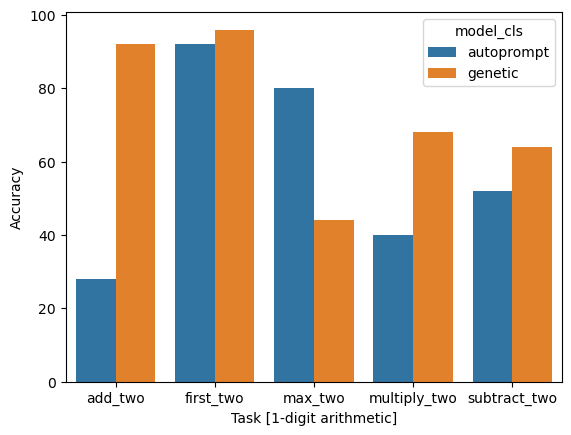

In [86]:
md10_df = df[(df["max_digit"] == 10) & (df["model_name"] == "model_6b")].groupby(["task_name", "model_cls"]).mean().reset_index()

import seaborn as sns
ax = sns.barplot(data=md10_df, x='task_name', y='acc', hue='model_cls')
ax.set_xlabel("Task [1-digit arithmetic]")
ax.set_ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

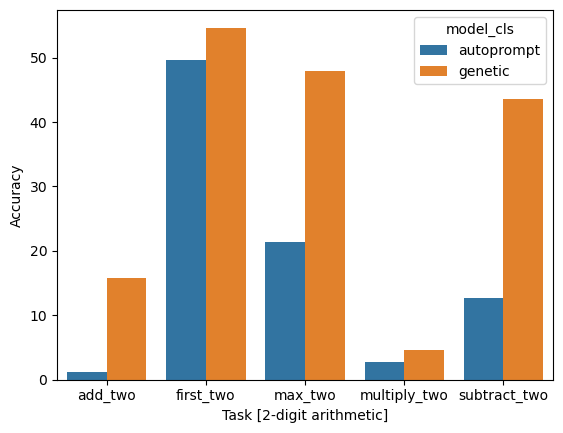

In [84]:
md100_df = df[(df["max_digit"] == 100)].groupby(["task_name", "model_cls"]).mean().reset_index()

import seaborn as sns
ax = sns.barplot(data=md100_df, x='task_name', y='acc', hue='model_cls')
ax.set_xlabel("Task [2-digit arithmetic]")
ax.set_ylabel("Accuracy")

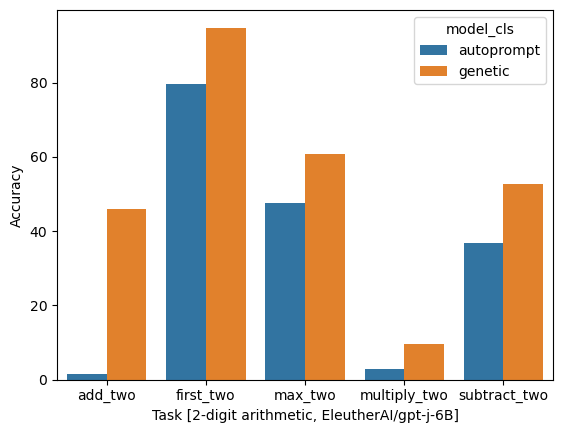

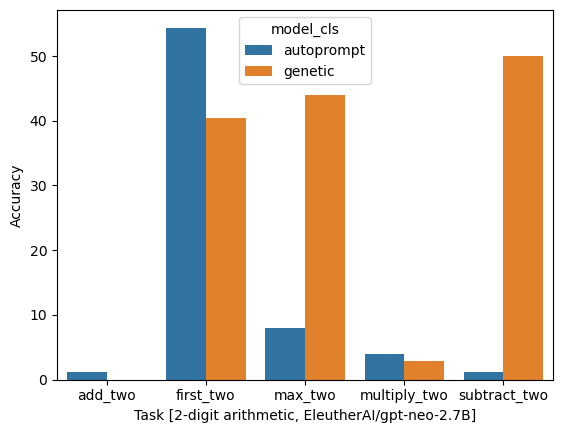

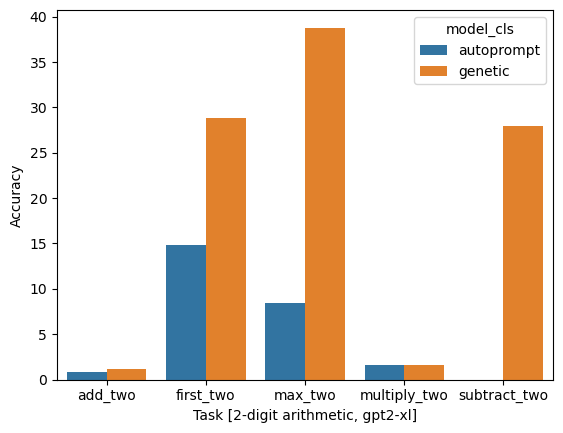

In [73]:
import matplotlib.pyplot as plt
for model_name in ALL_MODELS.keys():
    md100_df = df[(df["model_name"] == model_name) & (df["max_digit"] == 100)].groupby(["task_name", "model_cls", "model_name"]).mean().reset_index()

    import seaborn as sns
    ax = sns.barplot(data=md100_df, x='task_name', y='acc', hue='model_cls')
    ax.set_xlabel(f"Task [2-digit arithmetic, {ALL_MODELS[model_name]}]")
    ax.set_ylabel("Accuracy")
    plt.show()

In [81]:
df.groupby(["model_name", "model_cls", "max_digit"]).mean()

num_learned_tokens  n_shots       loss    acc
model_name model_cls  max_digit                                               
model_1b   autoprompt 10                        6.0      5.0  -7.745630  40.00
                      100                       6.0      5.0  -5.800953   5.12
           genetic    10                        6.0      5.0  -8.758271  34.40
                      100                       6.0      5.0  -6.997619  19.68
model_2b   autoprompt 10                        6.0      5.0   2.615681  21.60
                      100                       6.0      5.0   4.193747  13.76
           genetic    10                        6.0      5.0   2.408516  28.80
                      100                       6.0      5.0   3.757816  27.44
model_6b   autoprompt 10                        6.0      5.0 -14.288518  58.40
                      100                       6.0      5.0 -12.391754  33.68
           genetic    10                        6.0      5.0 -17.288848  72.80
                      100                       6.0      5.0 -15.365549  52.80